# Import Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

# Data Loading

In [9]:
df = pd.read_csv("NFLX_1.csv")

In [10]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
5,2002-05-31,1.078571,1.078571,1.071429,1.076429,1.076429,8464400
6,2002-06-03,1.080000,1.149286,1.076429,1.128571,1.128571,3151400
7,2002-06-04,1.135714,1.140000,1.110714,1.117857,1.117857,3105200
8,2002-06-05,1.110714,1.159286,1.107143,1.147143,1.147143,1531600
9,2002-06-06,1.150000,1.232143,1.148571,1.182143,1.182143,2305800


In [11]:
viz = df.copy()

# Data Preparation

In [12]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
df.shape

(5044, 7)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,5044.0,1.164680e+02,1.687409e+02,0.377857,3.955357e+00,2.581929e+01,1.557625e+02,6.923500e+02
High,5044.0,1.182374e+02,1.711409e+02,0.410714,4.031072e+00,2.634214e+01,1.576550e+02,7.009900e+02
Low,5044.0,1.145787e+02,1.661198e+02,0.346429,3.885357e+00,2.545500e+01,1.539450e+02,6.860900e+02
Close,5044.0,1.164563e+02,1.686682e+02,0.372857,3.958571e+00,2.580286e+01,1.558700e+02,6.916900e+02
Adj Close,5044.0,1.164563e+02,1.686682e+02,0.372857,3.958571e+00,2.580286e+01,1.558700e+02,6.916900e+02
Volume,5044.0,1.653068e+07,1.924487e+07,285600.000000,6.168225e+06,1.059135e+07,1.986552e+07,3.234140e+08


In [16]:
# Prepare the feature matrix and target vector
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

In [17]:
# Create custom split to avoid ignoring the first splitin cross-validation
def custom_time_series_split(X, n_splits):
    n_samples = len(X)
    test_size = n_samples // n_splits
    train_size = test_size  # You can adjust this ratio as needed

    for i in range(n_splits):
        start = i * test_size
        end = start + test_size
        train_indices = list(range(start)) + list(range(end, n_samples))
        test_indices = list(range(start, end))
        yield train_indices, test_indices


In [18]:
# Determine an appropriate number of splits
n_splits = 10

# Model initialization
model = LinearRegression()

# Lists to store scores for each fold
models = []
mse_scores = []
r2_scores = []

In [19]:
# Perform the TimeSeries cross-validation
for train_index, test_index in custom_time_series_split(X, n_splits):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Define and fit the model within the loop
    model_lnr = LinearRegression()
    model_lnr.fit(X_train, y_train)
    
    # Predict the result with the same input, but different training data
    y_pred = model_lnr.predict(X_test)
    result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
    print(result)
    
    # Store the model if needed later
    models.append(model_lnr)

    # Predict on the test set
    y_pred = model_lnr.predict(X_test)
    
    # Store the predictions in the DataFrame
    df.loc[test_index, 'Close_Prediction'] = y_pred  # Update only the test indices

    # Calculate and store the metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_scores.append(mse)
    r2_scores.append(r2)

# Output the average of the scores
print("Average MSE:", np.mean(mse_scores))
print("Average R2:", np.mean(r2_scores))


[257.47470828]
[257.47387666]
[257.47482162]
[257.47509698]
[257.47028443]
[257.47779765]
[257.4625303]
[257.358253]
[257.59071817]
[257.5820949]
Average MSE: 3.4723129868220655
Average R2: 0.9978697743033589


D:\Program Files\anaconda 3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Program Files\anaconda 3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Program Files\anaconda 3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Program Files\anaconda 3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Program Files\anaconda 3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Program Files\anaconda 3\Lib\site-packages\sklearn\base.py:439: UserWarn

In [20]:
# Immediately after the loop
print(df[['Date', 'Close', 'Close_Prediction']].dropna().head())  # This shows a few rows where predictions exist


         Date     Close  Close_Prediction
0  2002-05-23  1.196429          1.294173
1  2002-05-24  1.210000          1.224872
2  2002-05-28  1.157143          1.196923
3  2002-05-29  1.103571          1.115198
4  2002-05-30  1.071429          1.093960


# Model Evaluation

In [21]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 19.174
RMSE 4.379
MAE 3.333
MAPE 0.007
R2 Score :  0.998


# Model Visualization

In [22]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method

In [23]:
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')

In [24]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2002-05-23,1.196429
2002-05-24,1.210000
2002-05-25,NaN
2002-05-26,NaN
2002-05-27,NaN
...,...
2022-05-30,NaN
2022-05-31,197.440002
2022-06-01,192.910004


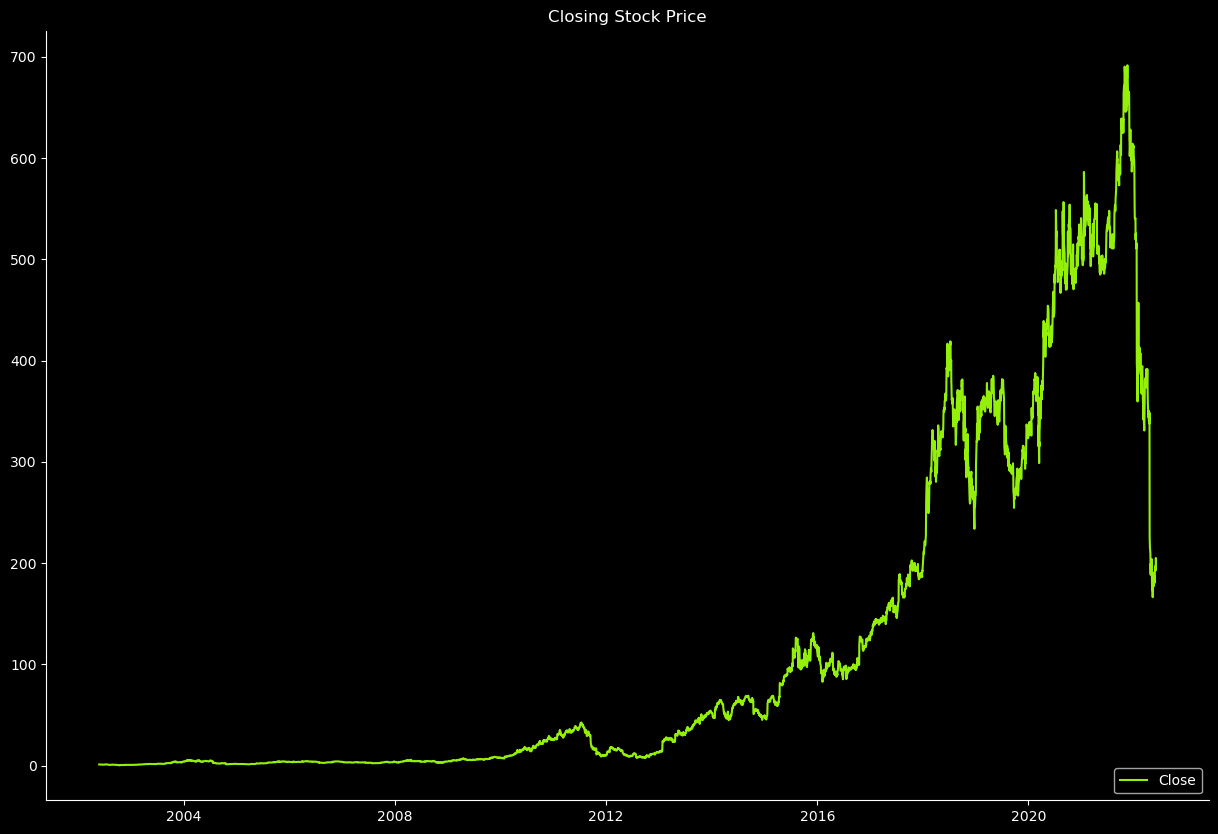

In [25]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

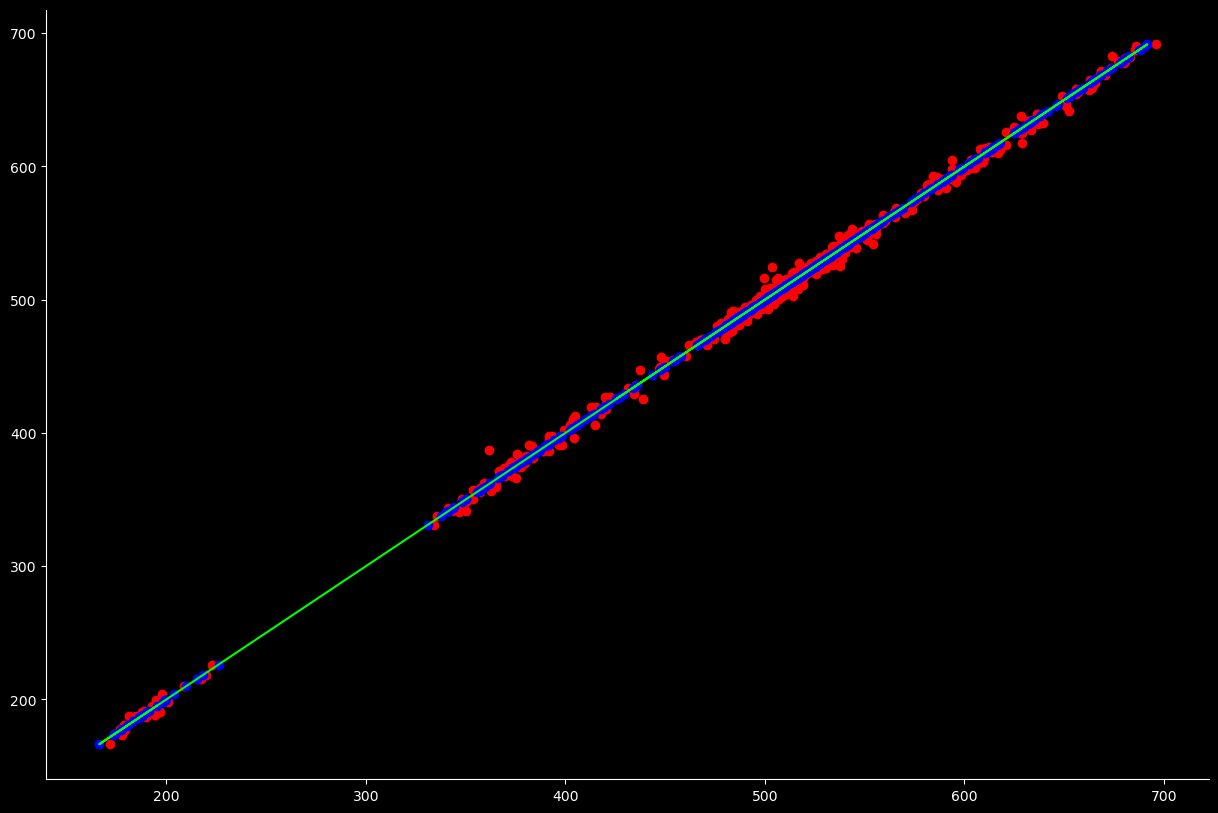

In [26]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [27]:
df[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,5044.0,116.456338,168.668232,0.372857,3.958571,25.802856,155.869999,691.690002
Close_Prediction,5040.0,116.409987,168.736090,0.373278,3.975478,25.828376,154.867332,696.005026


**Actual Close Price vs. Predicted Close Price**
<div class="flourish-embed flourish-chart" data-src="visualisation/13412598"><script src="https://public.flourish.studio/resources/embed.js"></script></div>

# Saving the Data as CSV

In [28]:
# Immediately after the loop
print(df[['Date', 'Close', 'Close_Prediction']].dropna().head())  # This shows a few rows where predictions exist


         Date     Close  Close_Prediction
0  2002-05-23  1.196429          1.294173
1  2002-05-24  1.210000          1.224872
2  2002-05-28  1.157143          1.196923
3  2002-05-29  1.103571          1.115198
4  2002-05-30  1.071429          1.093960


In [29]:
# If 'Date' is not in datetime format, convert it
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Select the relevant columns for output
output = df[['Date', 'Close', 'Close_Prediction']]

# Reset the index to remove any previous indexing, making 'Date' a column if not already
output.reset_index(drop=True, inplace=True)

# Set 'Date' as the index for the DataFrame
output.set_index('Date', inplace=True)

# Save the DataFrame to a CSV file
output.to_csv('Close_Prediction.csv', index=True)

print("CSV successfully saved!")

CSV successfully saved!
